# Cálculo com Python

Este é um **minicurso** sobre **resolução de problemas** de **cálculo** diferencial e integral usando [Python](https://www.python.org/) e a biblioteca de matemática simbólica [Sympy](http://www.sympy.org/). Não é necessário ter qualquer experiência na linguagem de programação [Python](https://www.python.org/) para seguir este curso.

Neste minicurso você vai **aprender** a usar o [Python](https://www.python.org/) para:

- manipular e graficar **funções** de uma variável;
- calcular **limites**;
- calcular **derivadas**;
- calcular **integrais** definidas e indefinidas.

Se você é um iniciante em [Python](https://www.python.org/) não é necessário instalar nenhum programa em seu computador para seguir este curso. O material do curso está disponível em formatos `IPYNB` ([Jupyter NoteBook](http://jupyter.org/)) e em `HTML`. Também, está disponível a seguinte ligação [Binder](https://mybinder.org/):

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/phkonzen/notas/master?filepath=%2Fsrc%2FMiniCalcPy)

Clicando na ligação acima, você tem acesso a um [Jupyter NoteBook](http://jupyter.org/) online com o material do minicurso.

## 1 - Funções de uma variável

Nesta primeira parte do minicurso **Cálculo com Python** você aprenderá a:

- definir **funções** de uma variável real;
- computar **valores de funções**;
- plotar **gráficos** funções;
- computar **zeros** de funções.

### Inportando a biblioteca [Sympy](http://www.sympy.org/)

O seguinte comando importa a biblioteca de matemática simbólica [Sympy](http://www.sympy.org/). Em um computador, clique sobre a seguinte célula e digite `SHIFT + ENTER` para executá-la. No celular ou _tablet_, toque no símbolo de _play_ no canto superior esquerdo da célula.

In [1]:
from sympy import *
# seleciona a melhor saída disponível
init_printing()

#### Definindo símbolos para variáveis e funções

Na sequência, vamos ver como podemos usar o [Sympy](http://www.sympy.org/) para lidarmos com funções reais de uma variável real, por exemplo: $y = f(x)$. Neste contexto, os símbolos $x$ e $y$ denotam as variáveis independente e dependente, respectivamente. O símbolo $x$ pode ser definido com a função [`var`](https://docs.sympy.org/latest/modules/core.html?highlight=var#sympy.core.symbol.var):

In [2]:
var('x')

**Exercício:**

Defina $y$ como variável simbólica.

In [3]:
# escreva sua resolução aqui!

### Definindo funções

Vamos ver como definir uma função $y = f(x)$ para ser utilizada mais tarde. Ao longo minicurso, vamos considerar a função:

$f(x) = (x^3 - 3x + 2)e^{-x/4} - 1$.

No [Python](https://www.python.org/) os operadores aritméticos básicos são:
<pre><code>+</code> adição</pre> 
<pre><code>-</code> subtração</pre>
<pre><code>*</code> multiplicão</pre>
<pre><code>/</code> divisão</pre>
<pre><code>**</code> potenciação</pre>

Também, muitas funções elementares já estão definidas por padrão no [Sympy](https://www.sympy.org/en/index.html). Veja a lista [aqui](https://docs.sympy.org/latest/modules/functions/elementary.html)!

Para definirmos $f$, podemos usar a função [`Lambda`](https://docs.sympy.org/latest/modules/core.html?highlight=lambda#sympy.core.function.Lambda) como segue:

In [4]:
f = Lambda(x, (x**3 - 3*x + 2)*exp(-x/4) - 1)
f

Com isso, para computar $f(1)$ digitamos:

In [5]:
f(1)

Note que a saída aparece na linha abaixo da entrada $f(1)$. Isto é, $f(1) = -1$. Podemos, inclusive utilizar argumentos simbólicos, como:

In [6]:
f(x-2)

Aqui, a saída significa que $f(x-2) = (-3x + (x-2)^3 + 8)e^{-\frac{x}{4} + \frac{1}{2}} - 1$, o que pode ser imediatamente verificado.

#### Exemplo:

Dada $g(x) = 2 - \sqrt{x^2 - 1}$, encontre $g(1)$, $g(0)$ e $g(2t)$.

Solução:

In [7]:
g = Lambda(x, 2 - sqrt(x**2 - 1))
g

In [8]:
g(1)

In [9]:
g(0)

Note que o sympy assume o domínio e a imagem da função como sendo um subconjunto dos números complexos. Além disso, antes de calcularmos $g(2t)$ precisamos definir $t$ como uma variável simbólica. Para que $t$ seja tratado como uma variável real, usamos o seguinte comando:

In [10]:
var('t', real=True)

Finalmente, computamos $g(2t)$ com:

In [11]:
g(2*t)

$\blacktriangleleft$

#### Exercício:

Dada $h(x) = \left|\sqrt{x} - 1\right| - 2\text{sen}(x)$, encontre $h(\pi)$, e $h(2u)$.

In [12]:
#digite a resposta aqui!

### Esboço do Gráfico

Para plotar o gráfico de uma função $f$ podemos usar o comando [`plot`](https://docs.sympy.org/latest/modules/plotting.html?highlight=plot#module-sympy.plotting.plot). Por exemplo, para a função $f$ definida anteriormente, temos:

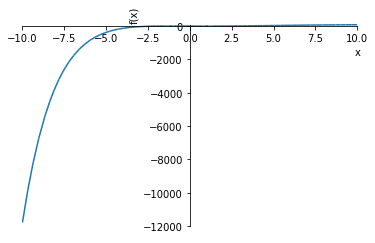

In [13]:
%matplotlib inline
plot(f(x))

- **Observação 1**: A "linha mágica" `%matplotlib inline` faz com que o gráfico apareça na mesma janela do ambiente. Sem esta linha, uma janela gráfica externa será aberta, quando disponível.

- **Observação 2**: O comando `plot(f(x))` tenta advinhar uma caixa gráfica adequada. Podemos alterar a caixa, informando o intervalo dos pontos de abscissa que gostaríamos de ver. Por exemplo:

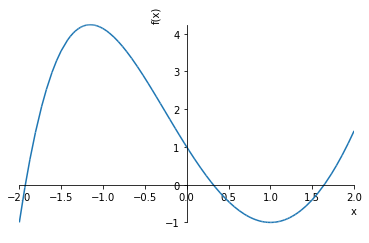

In [14]:
plot(f(x), (x, -2, 2))

#### Exercício:

Faça o esboço do gráfico de $\displaystyle g(x) = 2\text{tg}\left(x+\frac{\pi}{3}\right)$ restrita ao intervalo $\displaystyle \left(-\frac{5\pi}{6}, \frac{\pi}{6}\right)$.

In [15]:
#digite sua resolução aqui!

### Zeros de uma Função

O [SymPy](http://www.sympy.org/) conta com a função [`solve`](https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=solve#sympy.solvers.solvers.solve) para computar a solução de $f(x) = 0$. Por exemplo:

In [16]:
solve(x**2-1, x)

resolve $x^2 -1 = 0$. Entretanto a função [`solve`](https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=solve#sympy.solvers.solvers.solve) não resolve diretamente a equação $f(x) = 0$ definida anteriormente. Veja o que ocorre:
[sympy]:http://www.sympy.org/

In [17]:
solve(f(x), x)

NotImplementedError: multiple generators [x, exp(x/4)]
No algorithms are implemented to solve equation (x**3 - 3*x + 2)*exp(-x/4) - 1

A última linha da mensagem de erro nos diz que o [`solve`](https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=solve#sympy.solvers.solvers.solve) não contém um algoritmo para resolver $f(x) = 0$, no caso da $f(x)$ dada. Alternativamente, podemos usar a função [`nsolve`](https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve) que usa um algoritmo numérico para encontrar uma solução para o problema.

Vejamos como usar esta função [`nsolve`](https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve):

In [18]:
nsolve(f(x), x, -2)

In [19]:
nsolve(f(x), x, 0)

In [20]:
nsolve(f(x), x, 2)

Na verdade, esta função $f(x)$ tem, ainda, um zero $x \approx 45,\!9162$. Discutiremos isso mais detalhadamente na próxima parte deste minicurso, quando estudarmos a computação de limites com o [SymPy](https://www.sympy.org). 

#### Exercício:

Determine os zeros de $g(x) = \text{sen}\left(x-\frac{\pi}{3}\right) + \frac{1}{2}$.

In [ ]:
#digite a resolução aqui!

## Referências

+ [1] Python Software Fundation (US): [www.python.org](https://www.python.org/)

+ [2] Sympy - Python Library for Symbolic Mathematics: [www.sympy.org](http://www.sympy.org/)

## Ligações relacionadas

+ [1] Sympy Gamma: [www.sympygamma.org](http://www.sympygamma.com/)
+ [2] Sympy Live: [live.sympy.org](http://live.sympy.org/)
+ [3] Jupyter: [https://jupyter.org/](https://jupyter.org/)
+ [4] Binder: [https://mybinder.org/](https://mybinder.org/)

#### Next Topic: 2 - Limites

Criado: Out/2015 Última modificação: Out/2019